In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3 import DQN

In [4]:
BASE_PATH = '../../best_model'

In [6]:
model = DQN.load(f'{BASE_PATH}/dqn/CnnPolicy/best_model.zip')
model = DQN.load('../../output_models/dqn/CnnPolicy/2022-06-21_22_10_00_8.zip')
dqn_net = model.q_net

X = np.load(f'{BASE_PATH}/dqn/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([4576, 1, 1, 15, 7])

In [26]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

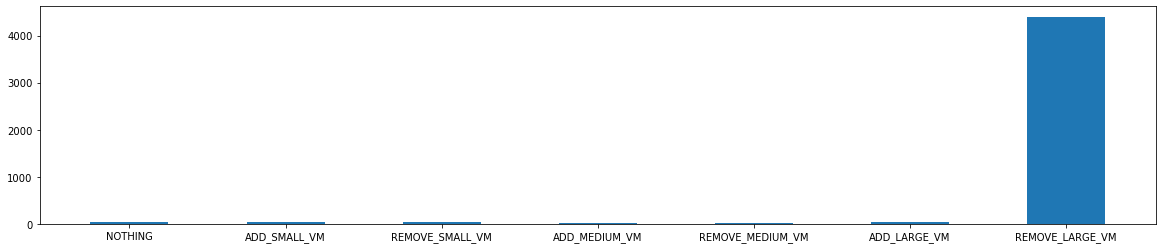

In [27]:
plot_action_histogram(predictions)

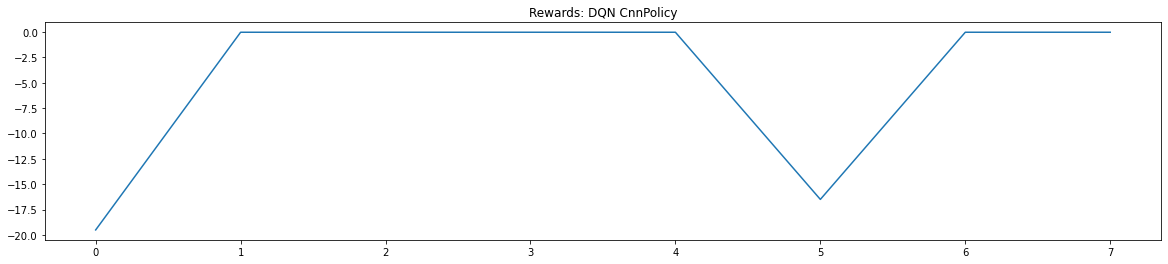

In [7]:
plot_training_data(f'{BASE_PATH}/dqn/CnnPolicy/best_model_rewards.csv', data_type='reward', title='DQN CnnPolicy')

In [66]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]
# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='cnn',
                             data=X_sample,
                            predictions=predictions_sample)
mean_attributions = ig_attributor.get_mean_attributions()


torch.Size([500, 1, 15, 7])


In [67]:
dqn_net.forward(X[0])

tensor([[-0.2290, -0.2454, -0.2412, -0.2159, -0.2420, -0.3217, -0.2155]],
       grad_fn=<AddmmBackward0>)

Mean attributions for action: NOTHING


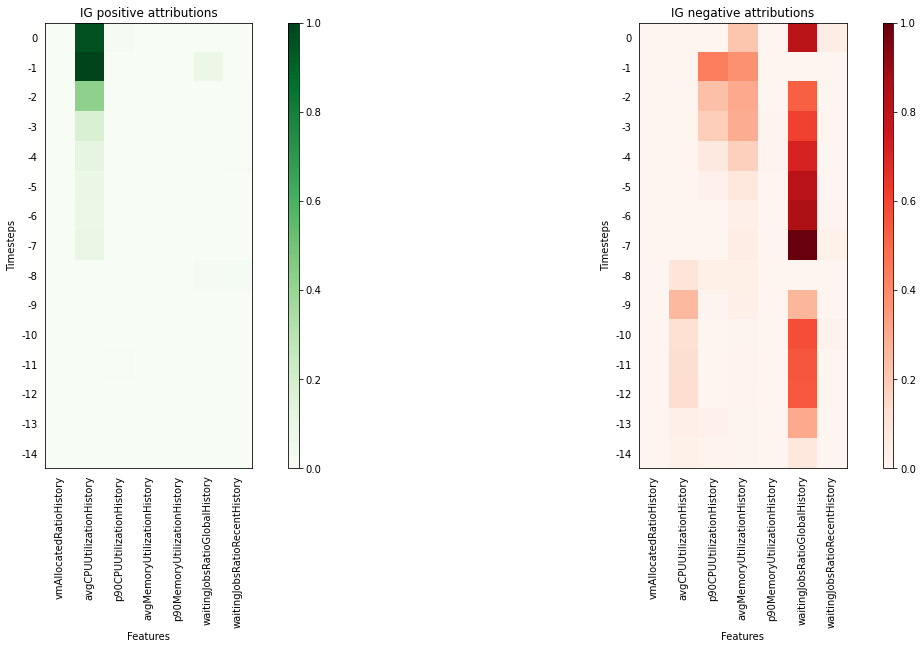

Mean attributions for action: ADD_SMALL_VM


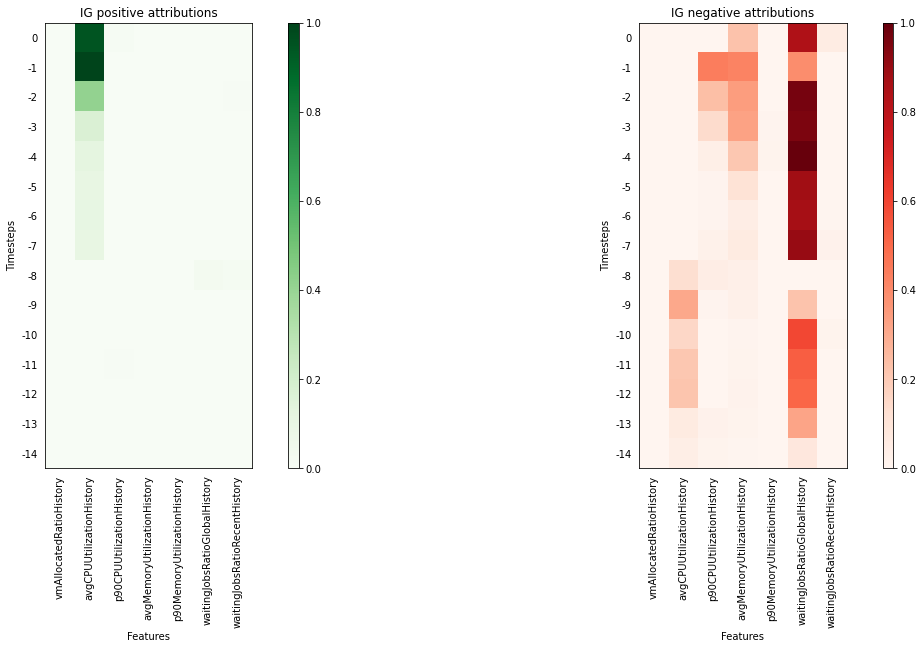

Mean attributions for action: REMOVE_SMALL_VM


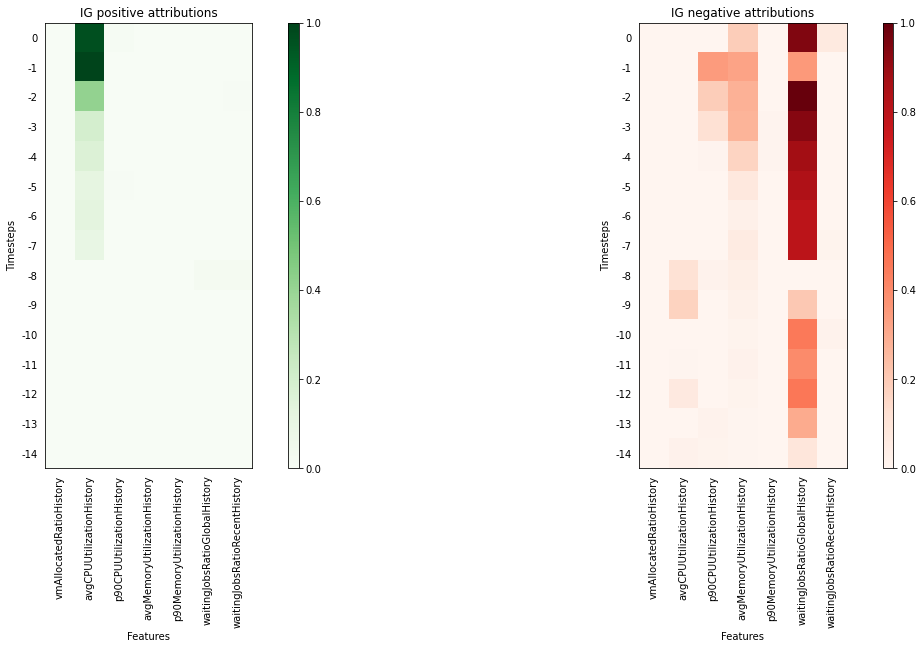

Mean attributions for action: ADD_MEDIUM_VM


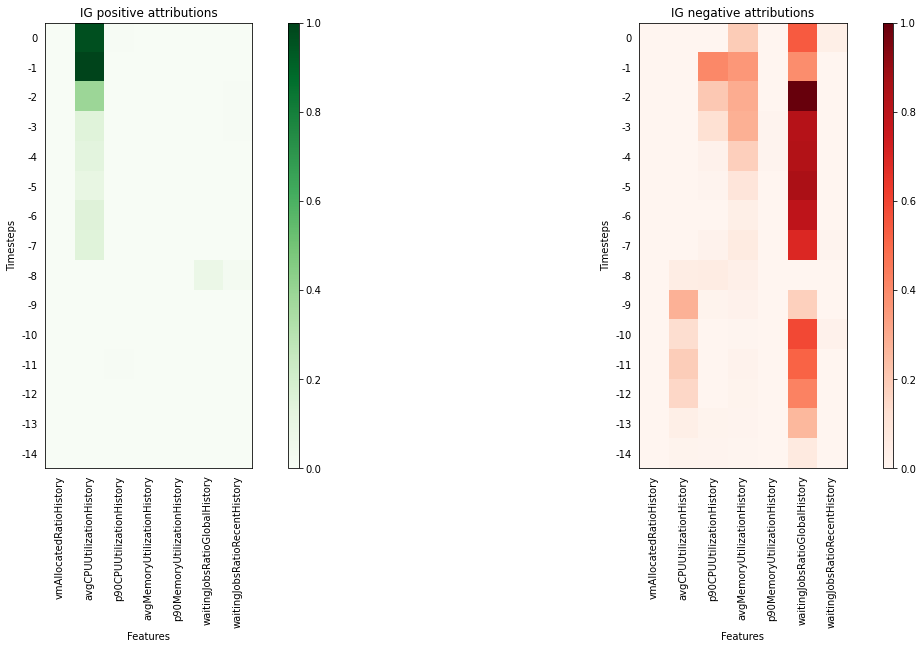

Mean attributions for action: REMOVE_MEDIUM_VM


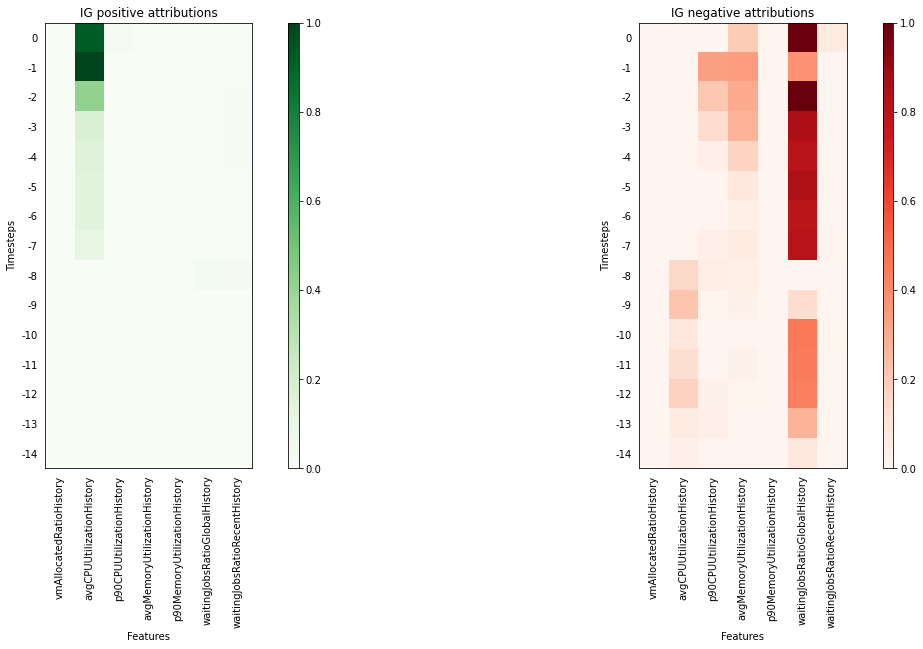

Mean attributions for action: ADD_LARGE_VM


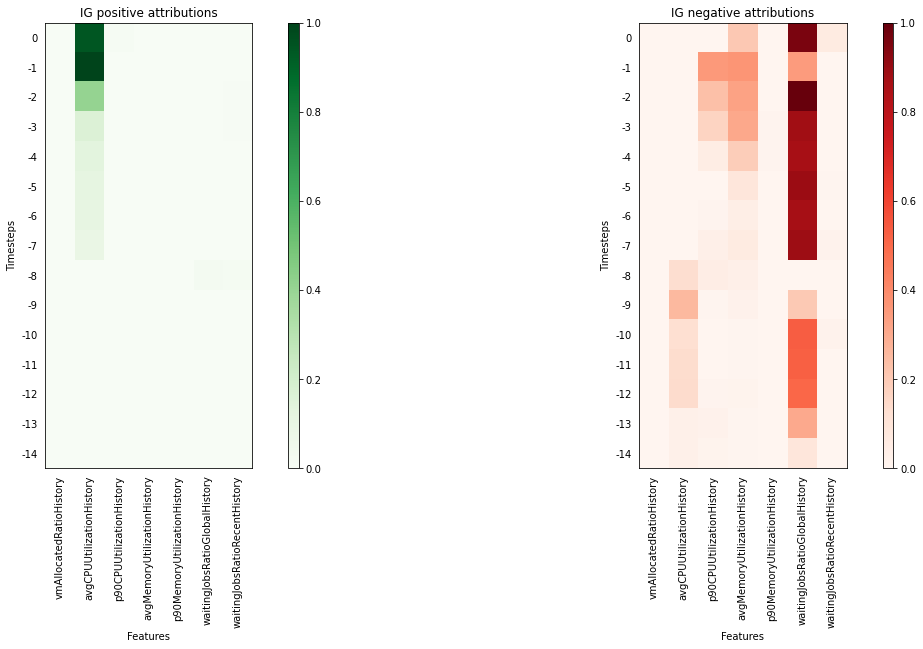

Mean attributions for action: REMOVE_LARGE_VM


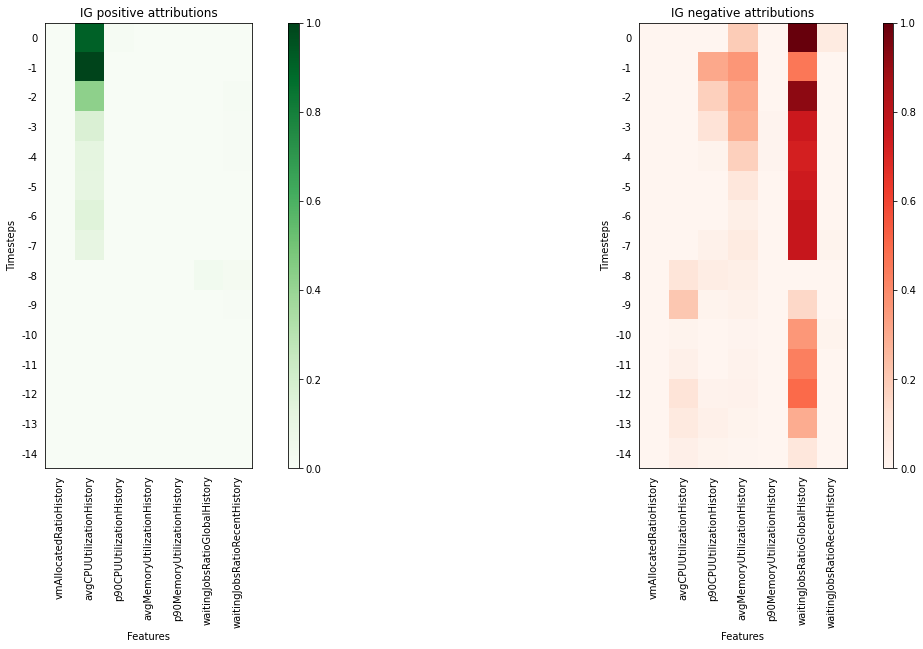

In [68]:
plot_mean_attributions(mean_attributions=mean_attributions, policy='cnn')

Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: 0.10202731937170029
ADD_SMALL_VM: 0.11055015027523041
REMOVE_SMALL_VM: 0.06406691670417786
ADD_MEDIUM_VM: 0.10189148783683777
REMOVE_MEDIUM_VM: 0.06446532905101776
ADD_LARGE_VM: -0.0010224618017673492
REMOVE_LARGE_VM: 0.12024831771850586

Mean attributions for action: NOTHING
tensor(0.) tensor(0.1233)


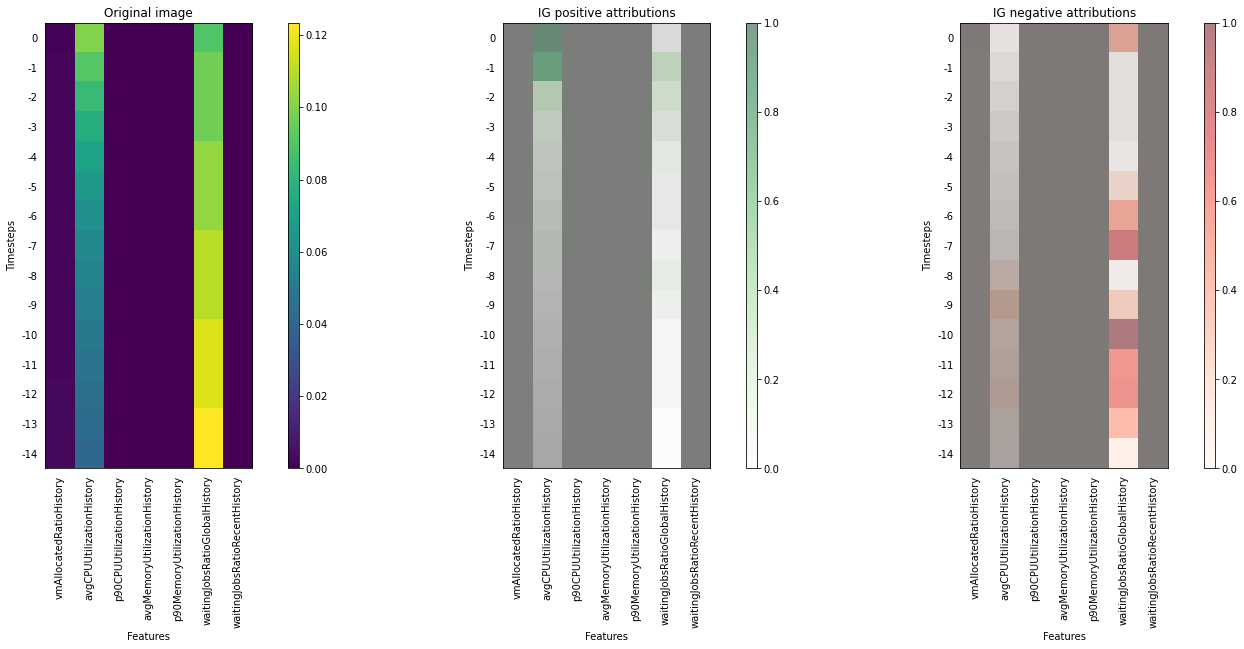

Mean attributions for action: ADD_SMALL_VM
tensor(0.) tensor(0.1233)


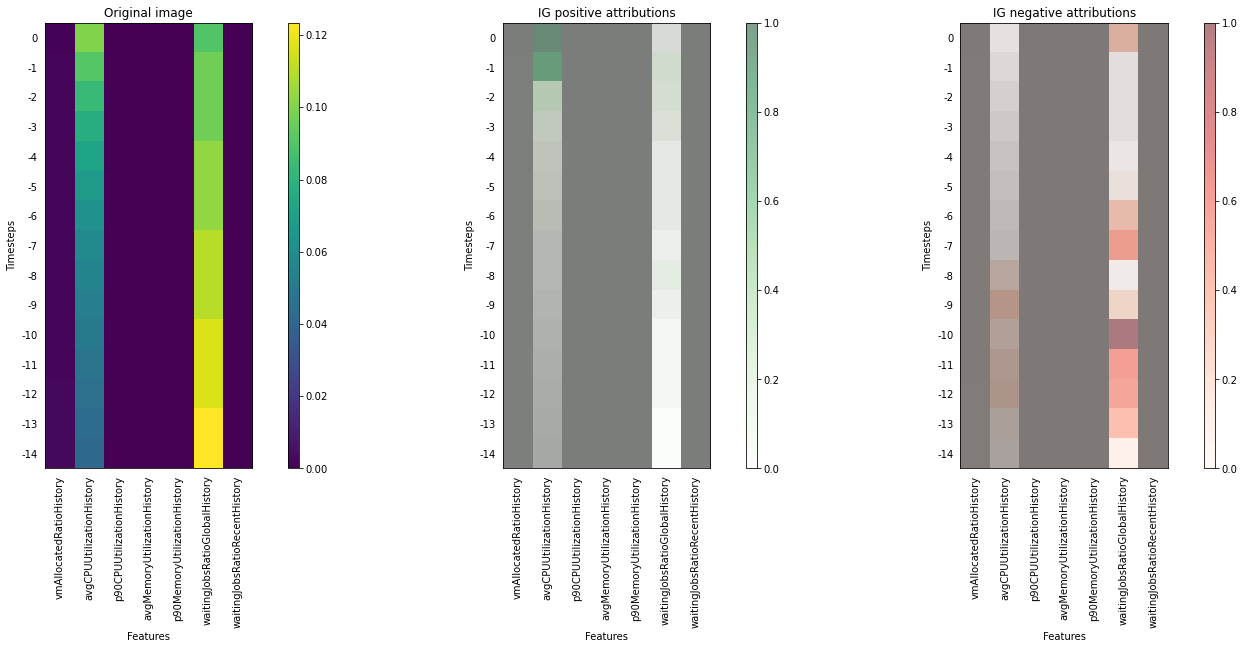

Mean attributions for action: REMOVE_SMALL_VM
tensor(0.) tensor(0.1233)


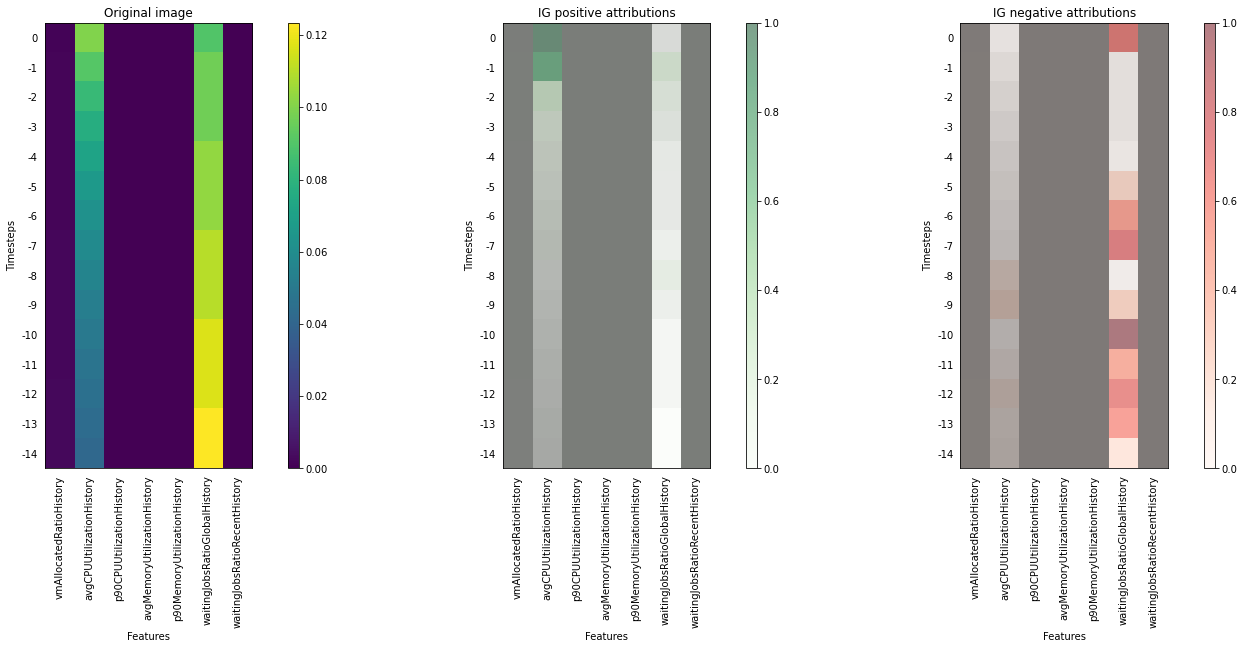

Mean attributions for action: ADD_MEDIUM_VM
tensor(0.) tensor(0.1233)


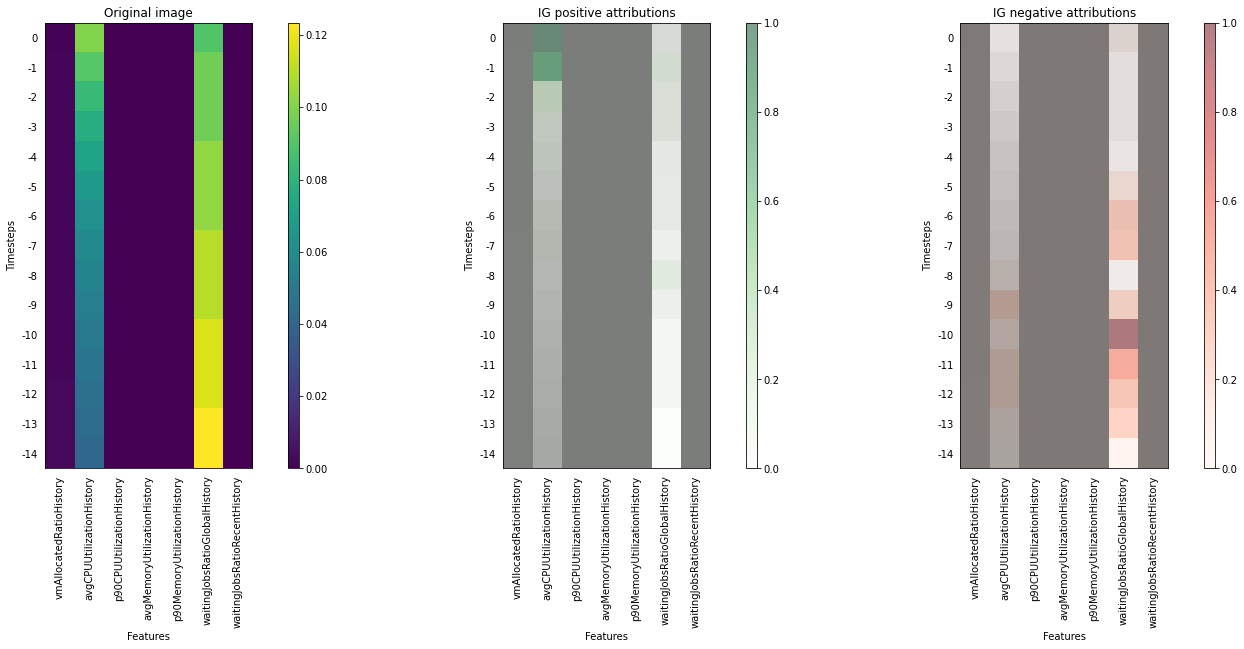

Mean attributions for action: REMOVE_MEDIUM_VM
tensor(0.) tensor(0.1233)


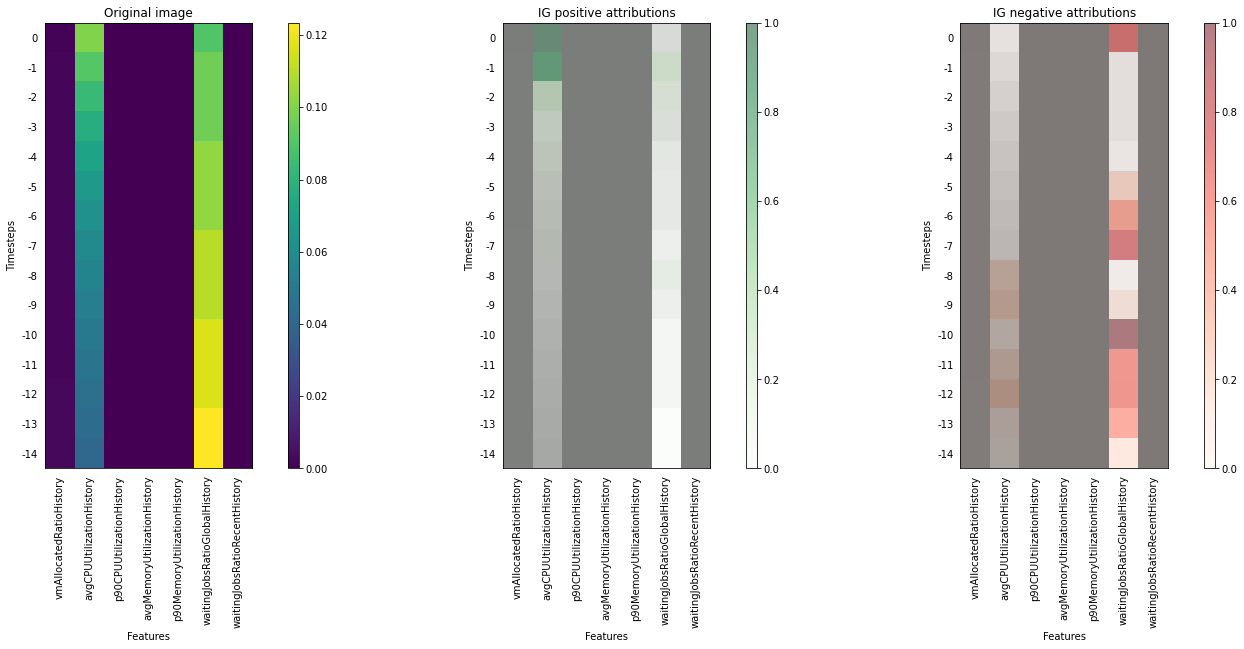

Mean attributions for action: ADD_LARGE_VM
tensor(0.) tensor(0.1233)


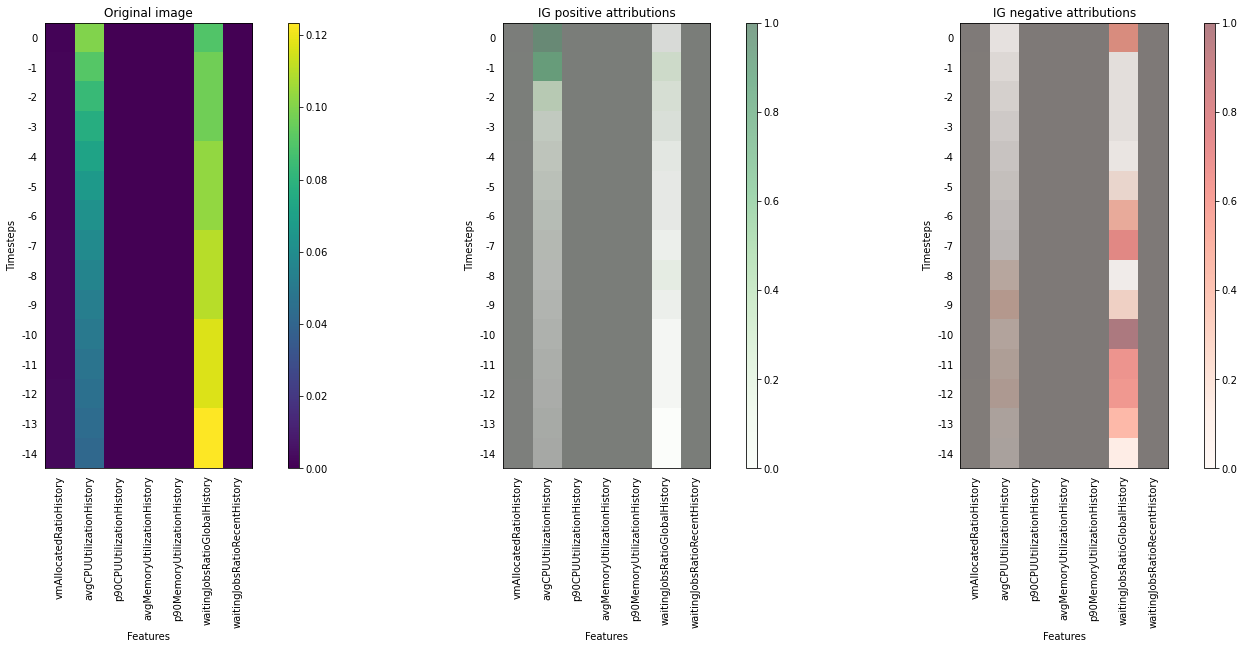

Mean attributions for action: REMOVE_LARGE_VM
tensor(0.) tensor(0.1233)


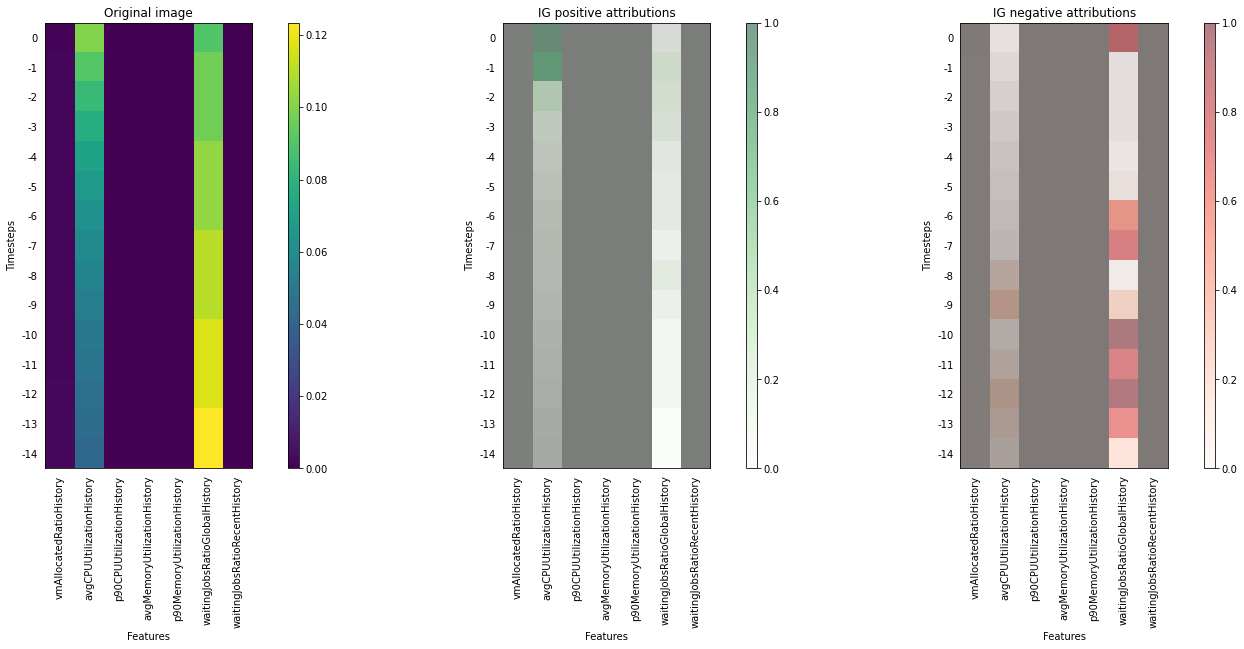

In [74]:
ig_attributor.explain_example(idx=20)

Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: -0.13217511773109436
ADD_SMALL_VM: -0.143321692943573
REMOVE_SMALL_VM: -0.1491328477859497
ADD_MEDIUM_VM: -0.11923399567604065
REMOVE_MEDIUM_VM: -0.1521548330783844
ADD_LARGE_VM: -0.22892627120018005
REMOVE_LARGE_VM: -0.10989466309547424

Mean attributions for action: NOTHING
tensor(0.) tensor(0.0767)


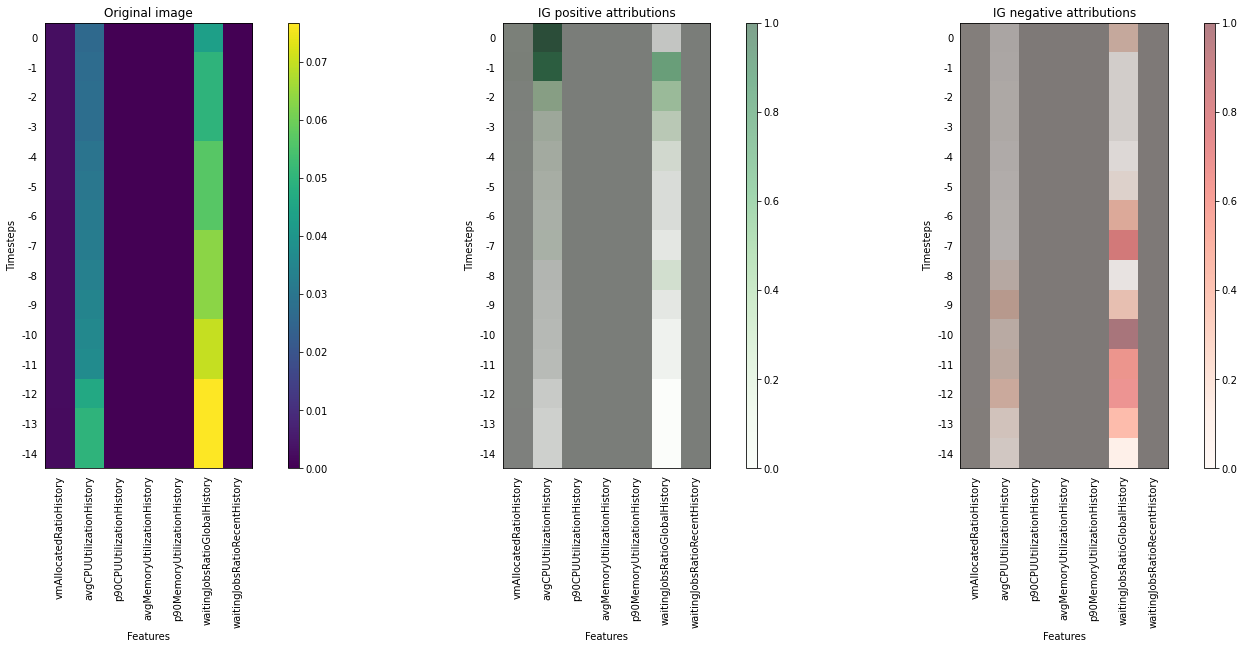

Mean attributions for action: ADD_SMALL_VM
tensor(0.) tensor(0.0767)


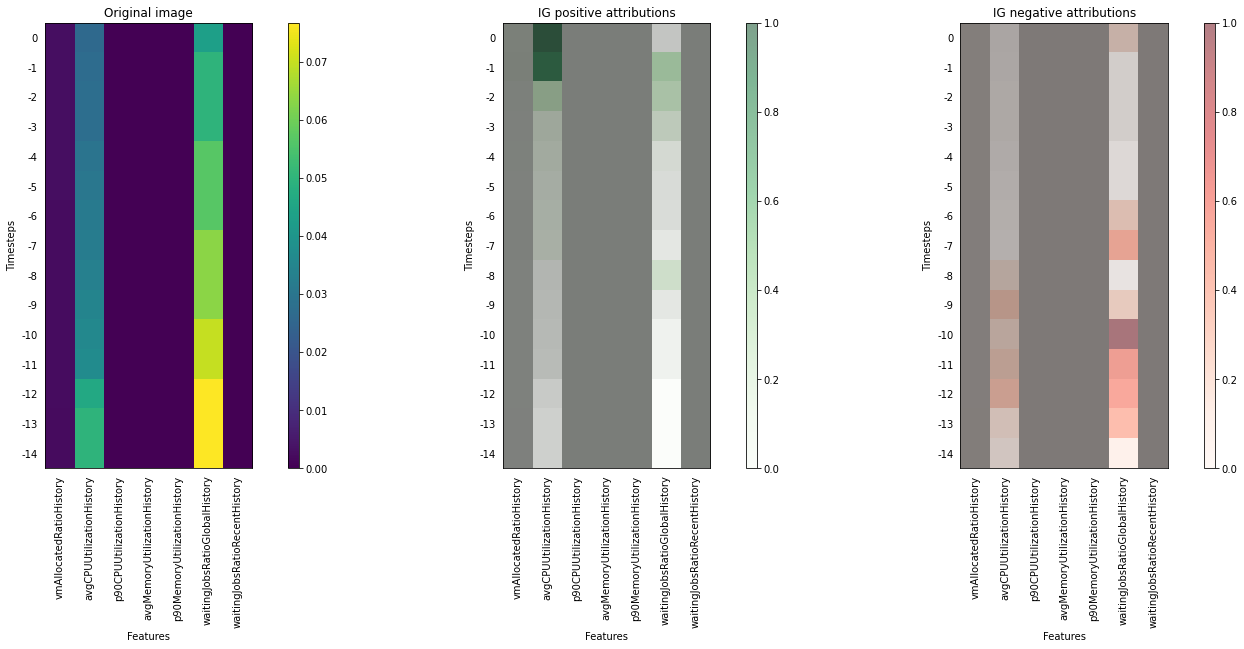

Mean attributions for action: REMOVE_SMALL_VM
tensor(0.) tensor(0.0767)


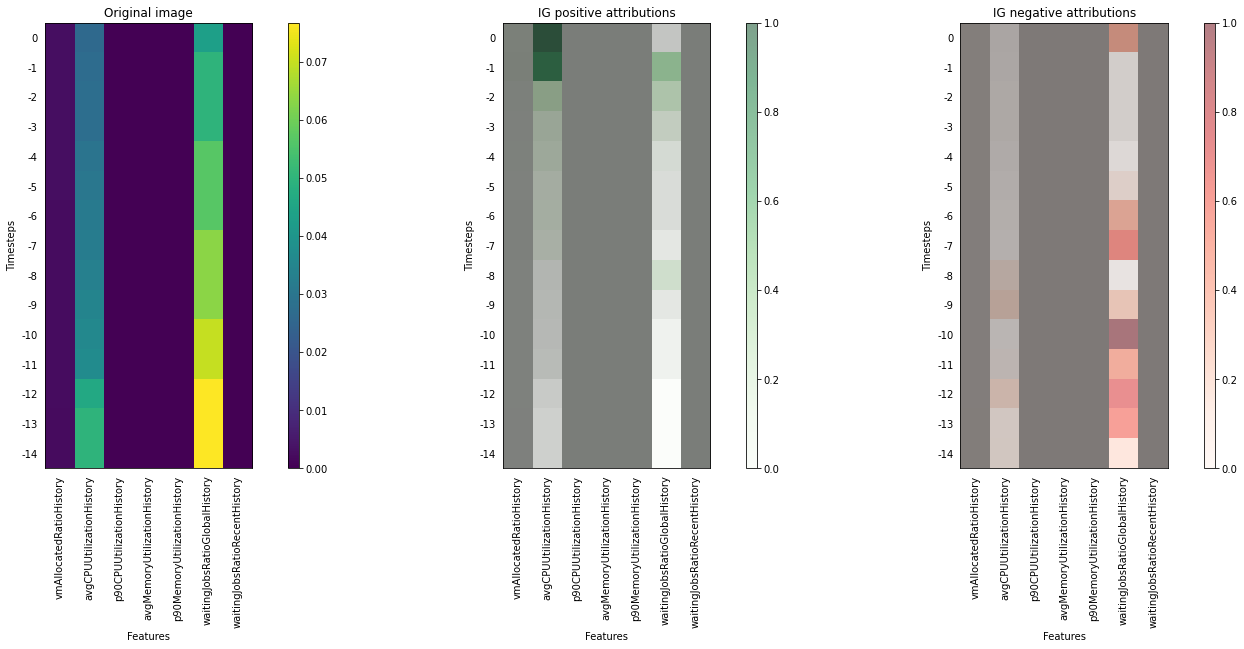

Mean attributions for action: ADD_MEDIUM_VM
tensor(0.) tensor(0.0767)


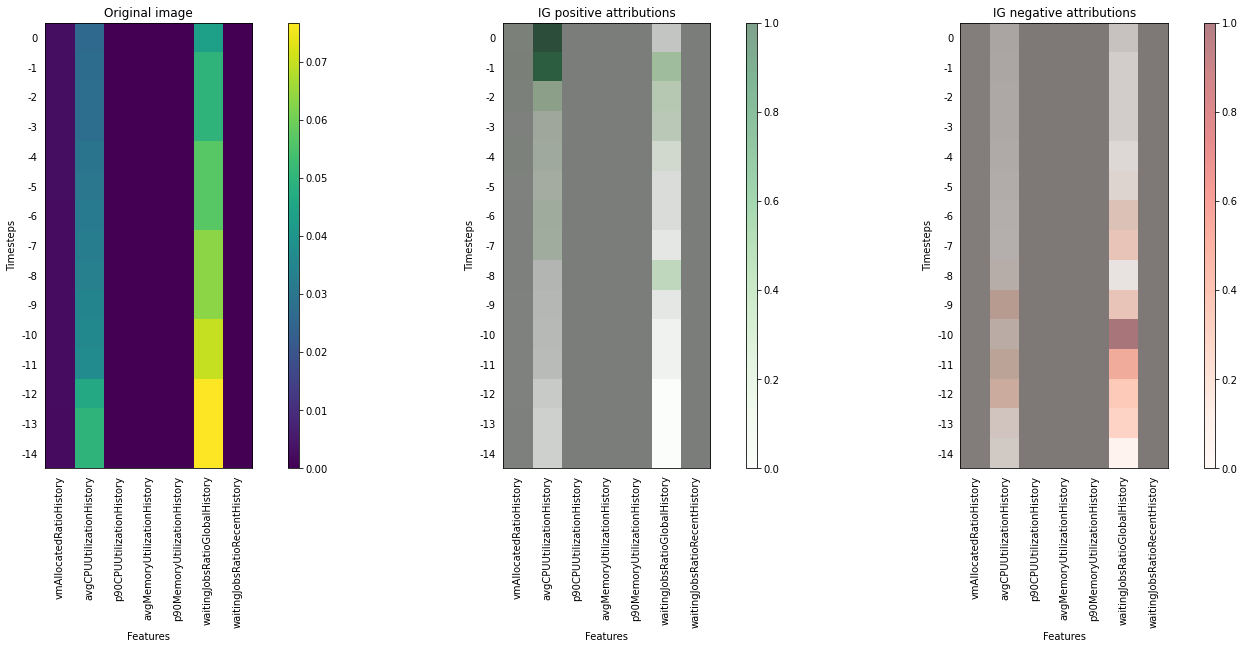

Mean attributions for action: REMOVE_MEDIUM_VM
tensor(0.) tensor(0.0767)


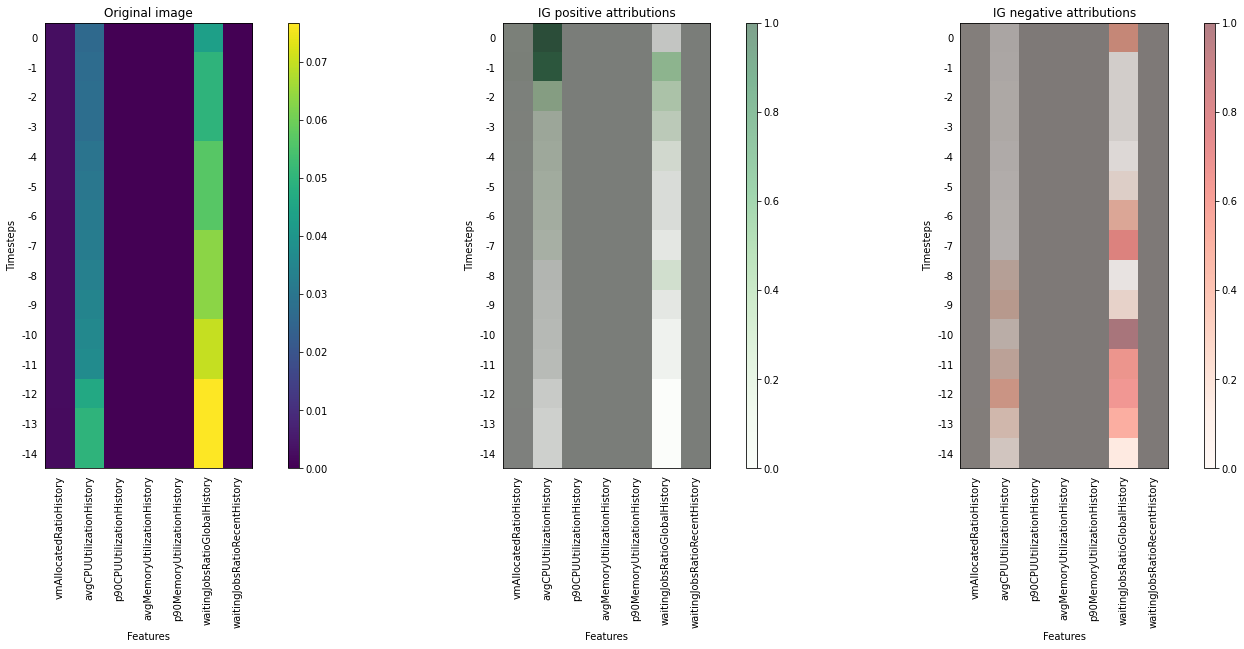

Mean attributions for action: ADD_LARGE_VM
tensor(0.) tensor(0.0767)


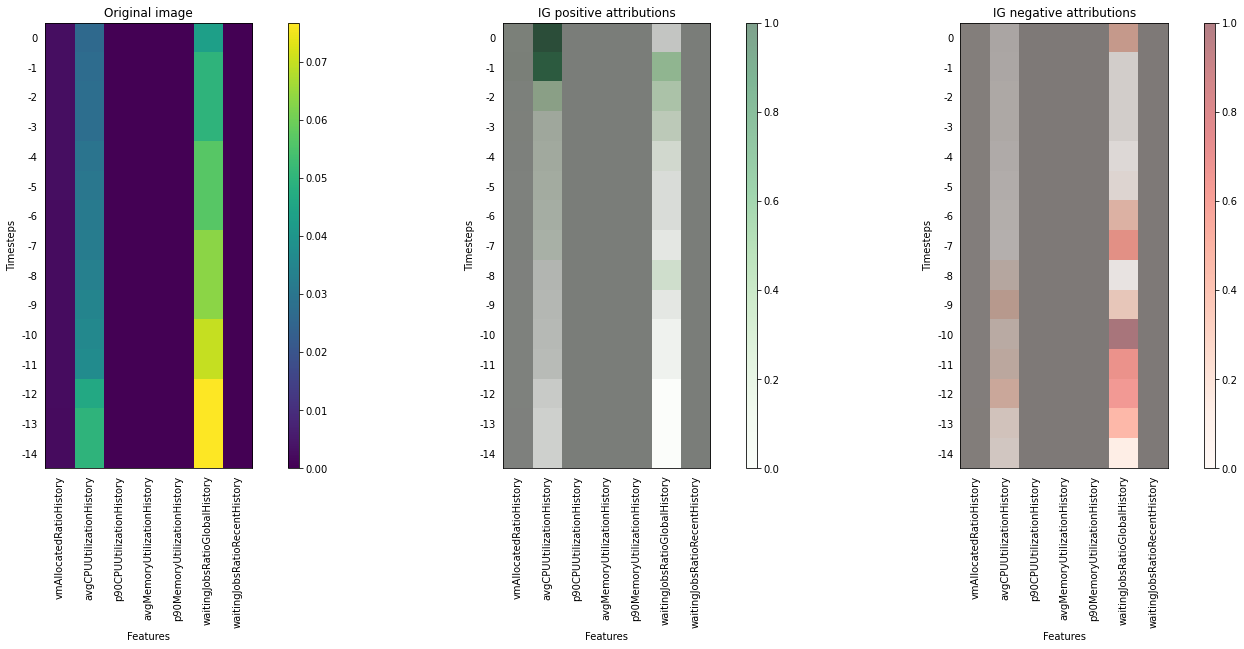

Mean attributions for action: REMOVE_LARGE_VM
tensor(0.) tensor(0.0767)


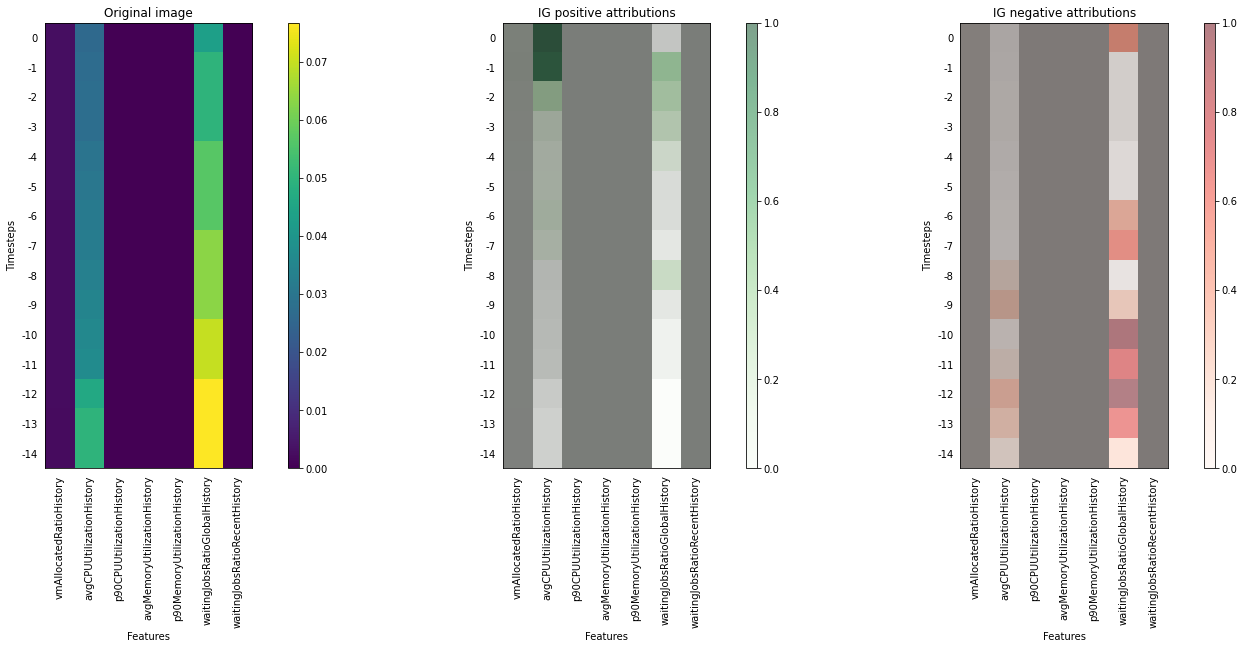

In [75]:
ig_attributor.explain_example(idx=200)

In [57]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [58]:
X_manual.shape

torch.Size([1, 1, 1, 15, 7])

In [59]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='cnn',
                            agent='dqn',
                            data=X_manual,
                            predictions=predictions_manual)

torch.Size([1, 1, 15, 7])


Action made: NOTHING
Q-values:
NOTHING: -10.474715232849121
ADD_SMALL_VM: -12.652986526489258
REMOVE_SMALL_VM: -12.56933879852295
ADD_MEDIUM_VM: -11.730649948120117
REMOVE_MEDIUM_VM: -12.461518287658691
ADD_LARGE_VM: -12.590862274169922
REMOVE_LARGE_VM: -12.568055152893066


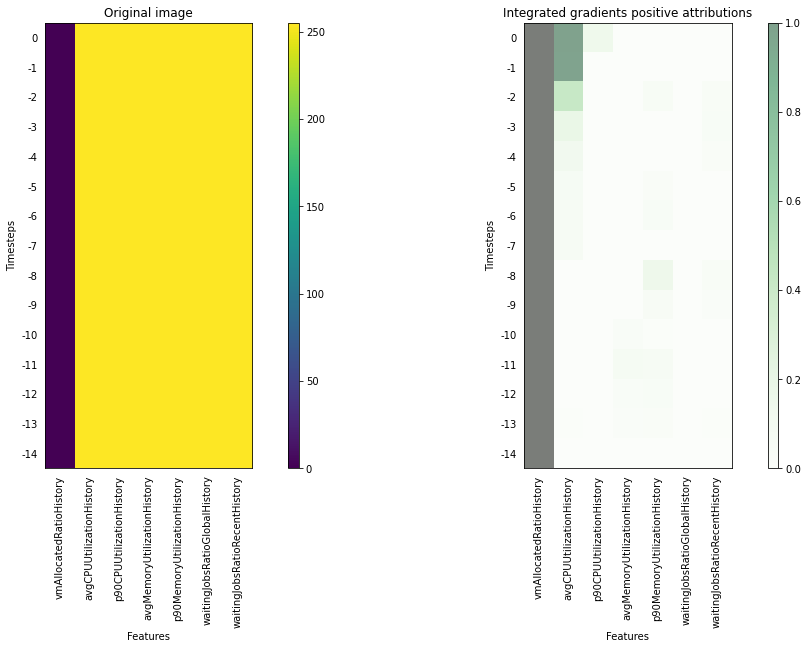

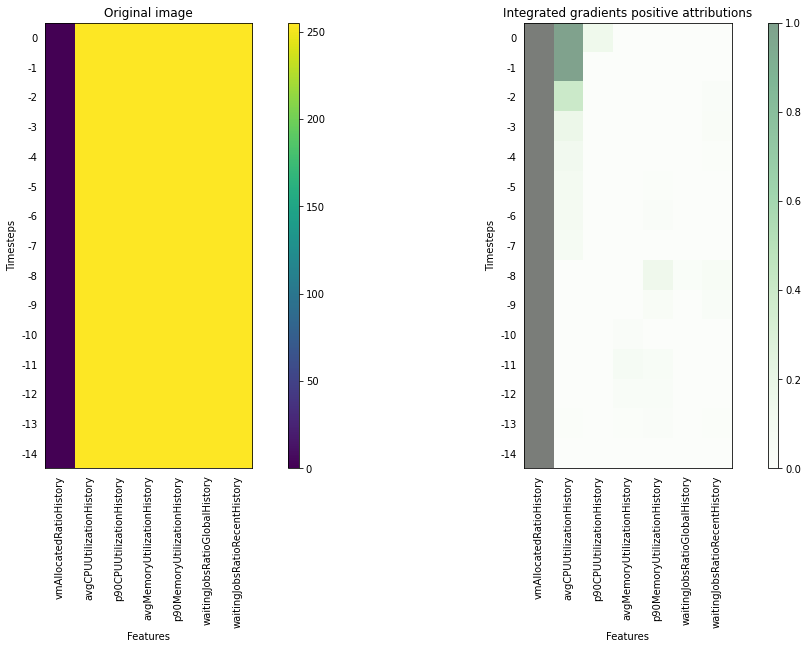

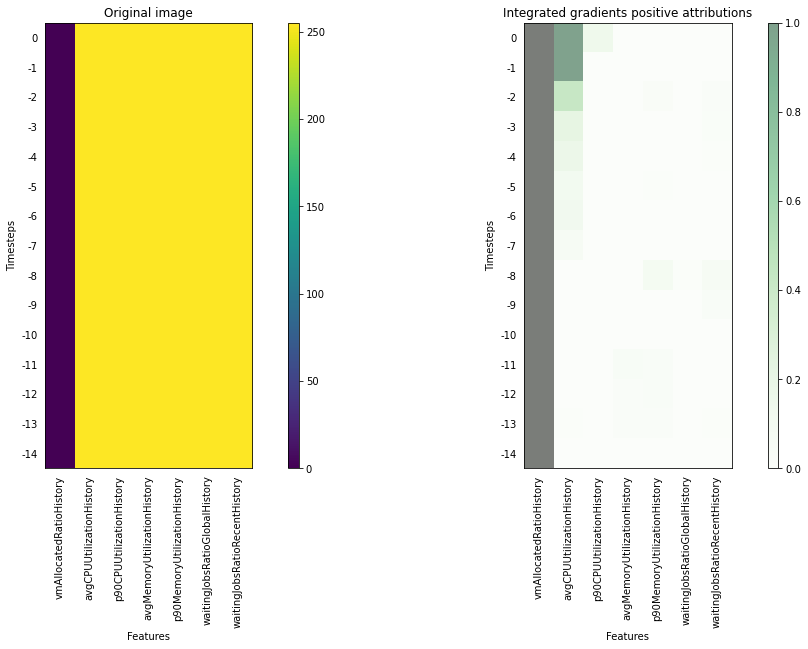

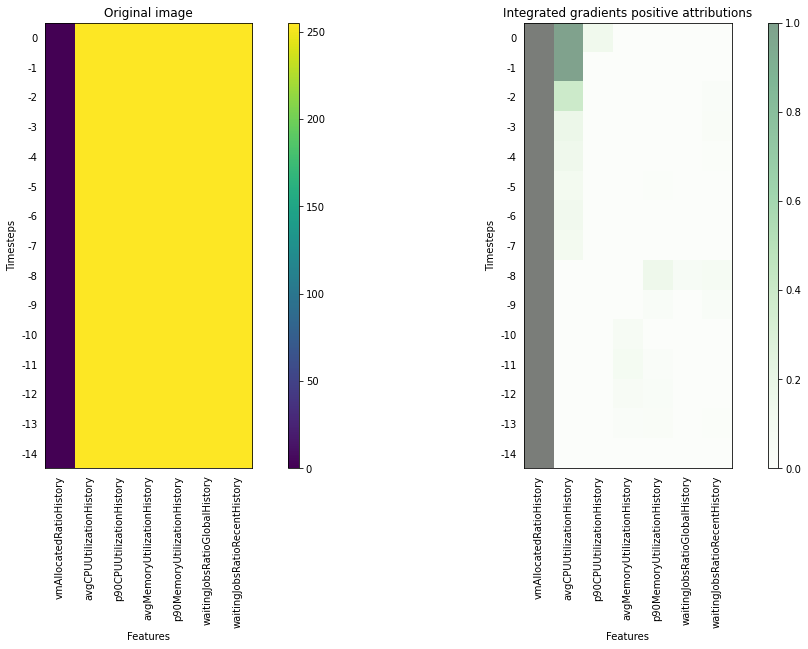

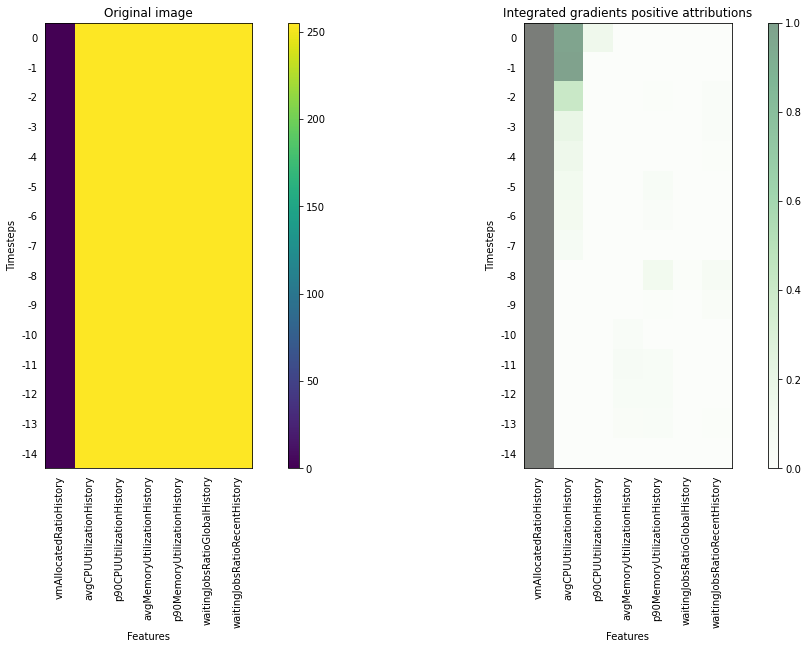

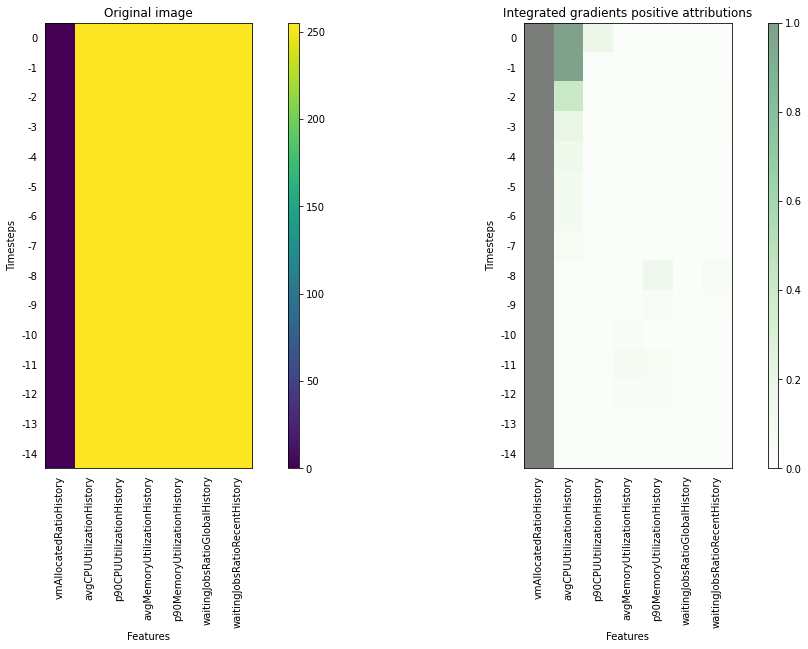

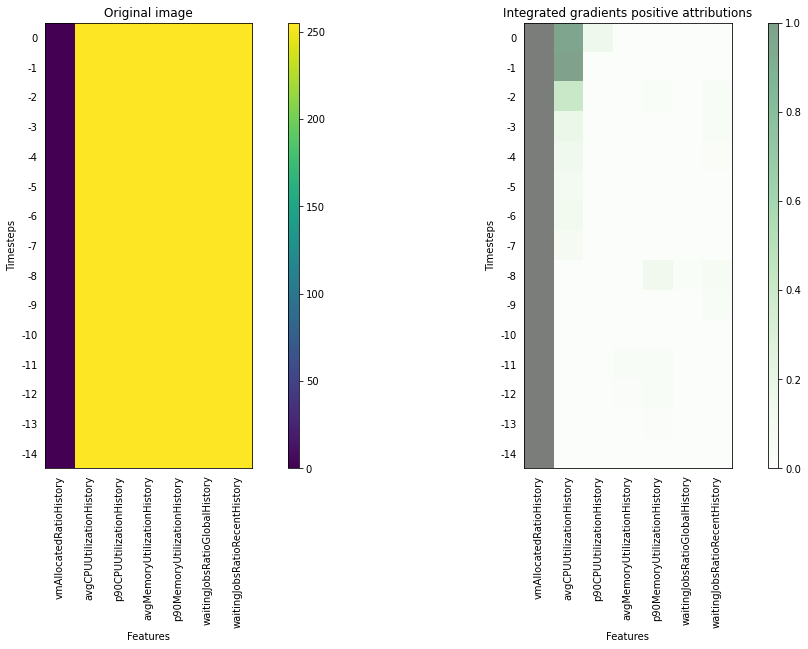

In [60]:
ig_attributor.explain_example(idx=0)